Sebelum diisi :
PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
dtype: int64

Setelah diisi :
PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
dtype: int64



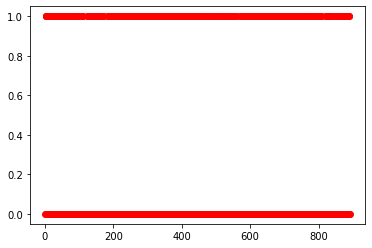

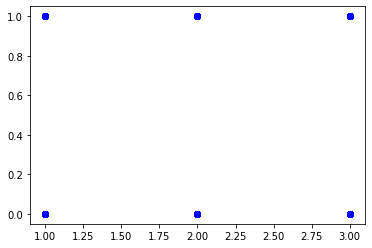

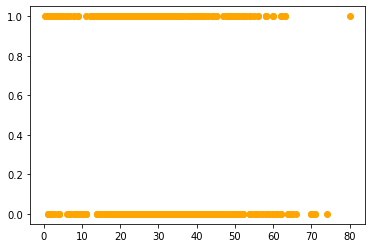

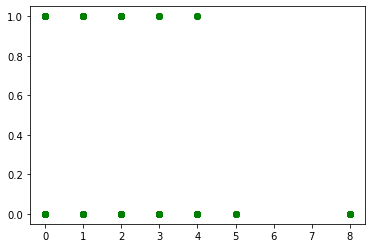

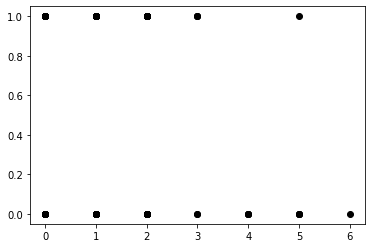


Correlation dari independent variable dengan dependent variable:
             PassengerId  Survived    Pclass       Age     SibSp     Parch
PassengerId     1.000000 -0.005007 -0.035144  0.033207 -0.057527 -0.001652
Survived       -0.005007  1.000000 -0.338481 -0.069809 -0.035322  0.081629
Pclass         -0.035144 -0.338481  1.000000 -0.331339  0.083081  0.018443
Age             0.033207 -0.069809 -0.331339  1.000000 -0.232625 -0.179191
SibSp          -0.057527 -0.035322  0.083081 -0.232625  1.000000  0.414838
Parch          -0.001652  0.081629  0.018443 -0.179191  0.414838  1.000000



In [4]:
# No.1
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

data= pd.read_csv('/input/titanic.txt')
# print(data.describe())
# No.1a

del data['Name']
del data['Sex']
del data['Ticket']
del data['Fare']
del data['Cabin']
del data['Embarked']
# ANALISIS: pada nomor ini dilakukan penghapusan kolom Name, Sex,Ticket, Fare, Cabin, dan Embarked, untuk melihat hasil
# dapat menggunakan print(data) untuk melihat kolom yang tersisa, Jika hal ini dilakukan, maka akan terlihat sudah terhapusnya kolom tersebut

# No.1b
# untuk periksa missing value
print("Sebelum diisi :")
print(data.isnull().sum())   
# untuk mengisi missing value dengan nilai rata-rata   
data=data.fillna(data.mean())
# untuk mengecek semua missing value sudah terisi atau belum
print("")
print("Setelah diisi :")
print(data.isnull().sum())
# ANALISIS:pada nomor ini, dilakukan pengisian data yang kosong dengan nilai rata-rata, berdasarkan code print(data.isnull().sum()) dapat
# dilihat jika pada kolom age terdapat data yang kosong, oleh sebab itu dilakukan pengisian dengan data mean, lalu diprint kembali 
# hasil akhir print pun terlihat jika semua kolom sudah tidak memiliki data yang kosong lagi
print("")

# No.1c
plt.scatter(PassengerId,Survived,color='Red')
plt.show()
plt.scatter(Pclass,Survived,color='Blue')
plt.show()
plt.scatter(Age,Survived,color='Orange')
plt.show()
plt.scatter(SibSp,Survived,color='Green')
plt.show()
plt.scatter(Parch,Survived,color='Black')
plt.show()
print("")
# ANALISIS: Berikut hubungan 2 atau 3 variable yang terdapat dalam grafik:
# Berdasarkan visualisasi yang pertama (PassengerId dengan Survived), dapat dilihat jika Passenger Id tidak mempengaruhi keselamatan penumpang.
#  Hal ini dikarenakan bentuk grafik yang terbentuk seperti lambang sama dengan(=)
# Berdasarkan visualisasi yang ketiga (Age dengan Survived), dapat dilihat jika dari umur 60 ke atas, jumlah penumpang yang selamat semakin sedikit.
#  Oleh sebab itu, umur dapat mempengaruhi tingkat keselamatan para penumpang kapal
# Berdasarkan visualisasi yang keempat(SibSp dengan Survived), maka didapatkan kesimpulan jika nilai SibSp mempengaruhi keselamatan awak kapal, 
# dimana awak yang memiliki SibSp yang lebih besar dari empat, maka tidak selamat.

# No.1d
print("Correlation dari independent variable dengan dependent variable:")
correlation=data.corr()
print(correlation)
print("")
# ANALISIS: Berdasarkan hasil print correlation, correlation antar variabel tidak terlalu bagus dikarenakan terdapat
#  beberapa yang menghasilkan nilai  mendekati -1


In [5]:
# No.2
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

data= pd.read_csv('/input/titanic.txt')
del data['Name']
del data['Sex']
del data['Ticket']
del data['Fare']
del data['Cabin']
del data['Embarked']
  
data=data.fillna(data.mean())
# No.2
# untuk memisahkan kolom independent(x) dengan kolom dependent(y)
y=data.Survived
x=data.drop('Survived',axis=1)
# untuk membagi data train set(70%) dengan test set(30%)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
# untuk print training set
print(x_train)
print(y_train)
# ANALISIS: berdasarkan hasil print x_train dan y_train maka dapat dilihat jika data sudah terbagi antara train set dan test set, lalu antara data yang independent dengan dependent juga sudah terpisah

     PassengerId  Pclass        Age  SibSp  Parch
654          655       3  18.000000      0      0
358          359       3  29.699118      0      0
548          549       3  33.000000      1      1
750          751       2   4.000000      1      1
669          670       1  29.699118      1      0
..           ...     ...        ...    ...    ...
60            61       3  22.000000      0      0
647          648       1  56.000000      0      0
599          600       1  49.000000      1      0
383          384       1  35.000000      1      0
335          336       3  29.699118      0      0

[623 rows x 5 columns]
654    0
358    1
548    0
750    1
669    1
      ..
60     0
647    1
599    1
383    1
335    0
Name: Survived, Length: 623, dtype: int64


In [9]:
# No.3
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

data= pd.read_csv('/input/titanic.txt')
del data['Name']
del data['Sex']
del data['Ticket']
del data['Fare']
del data['Cabin']
del data['Embarked']
  
data=data.fillna(data.mean())
y=data.Survived
x=data.drop('Survived',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
# No.3a
# untuk melakukan pembelajaran
Belajar=LinearRegression().fit(x_train,y_train)
# untuk menyimpan hasil prediksi
hasilPrediksi=Belajar.predict(x_test)

# No.3b
# untuk print hasil prediksi
print("Hasil Prediksi:")
print(hasilPrediksi)
# untuk print hasil aktual atau sebenarnya
print("")
print("Data Aktual:")
print(y_test)
# ANALISIS: berdasarkan hasil print dapat dilihat jika hasilPrediksi dan y_test dapat dilihat(proses training dan hasil prediksi dapat berjalan)


Hasil Prediksi:
[ 0.13940216  0.60925592  0.19490255  0.24735825  0.67416974  0.26262655
  0.59306273  0.20906816  0.66554073  0.16706171  0.2174196   0.04868847
  0.17962936  0.29157488  0.43477895  0.25259406  0.23042363  0.43592125
  0.39868045  0.5724404   0.22305934  0.50308335  0.40284719  0.22532685
  0.61251211  0.23783114  0.21629947  0.23478918  0.32668657  0.39664778
  0.19346184  0.18495316  0.15877055  0.47239155  0.66657371  0.23086
  0.37345327  0.72686974  0.08612034  0.22623441  0.18757142  0.45639482
  0.30444902  0.18530226  0.25655876  0.33696423  0.19943896  0.18451678
  0.27671415  0.20732278  0.26054808  0.39364088  0.18745086  0.23129009
  0.6483444   0.33703563  0.35304468  0.59478289  0.19938072  0.3165875
  0.19830629  0.13374679  0.52502145  0.46662452  0.25829302  0.17709647
  0.1886758   0.22693261  0.26760779  0.33447434  0.47717585  0.24167268
  0.13316176  0.63552902  0.24459079  0.2251871   0.14509401  0.24878
  0.83619652  0.6582572   0.40495259  0.18

In [14]:
## No.4
 
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

data= pd.read_csv('/input/titanic.txt')
Survived=data['Survived']
del data['Name']
del data['Sex']
del data['Ticket']
del data['Fare']
del data['Cabin']
del data['Embarked']
  
data=data.fillna(data.mean())
y=data.Survived
x=data.drop('Survived',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

Belajar=LinearRegression().fit(x_train,y_train)
hasilPrediksi=Belajar.predict(x_test)

# No.4a
print('Evaluasi Coefficient:')
print(Belajar.coef_)
print("")
# ANALISIS: berdasarkan hasil coefficient maka dapat dilihat jika
# peningkatan pada PassengerId dapat menyebabkan penurunan sebesar -4.58 pada jumlah awak yang selamat
# peningkatan pada Pclass dapat menyebabkan penurunan sebesar -2.30 pada jumlah awak yang selamat
# peningkatan pada Age dapat menyebabkan penurunan sebesar -7.48 pada jumlah awak yang selamat
# peningkatan pada SibSp dapat menyebabkan penurunan sebesar -2.61 pada jumlah awak yang selamat
# peningkatan pada Parch dapat menyebabkan peningkatan sebesar 5,2 pada jumlah awak yang selamat
# sehingga dapat dilihat jika age, Parch dan Passenger Id memiliki pengaruh yang besar terhadap keselamatan awak
 
# No.4b
print('Evaluasi Metrics:')
print("MAE: " , metrics.mean_absolute_error(y_test,hasilPrediksi))
print("MSE: " , metrics.mean_squared_error(y_test,hasilPrediksi))
print("RMSE: " , np.sqrt(metrics.mean_squared_error(y_test,hasilPrediksi)))
print("Mean survived:", Survived.mean())
# ANALISIS:Berdasarkan hasil output, dapat dilihat jika hasil Metrics RMSE SEBESAR 0,43 yang artinya lebih besar dari 10% rata-rata awak yang selamat
# hal ini pun dapat disimpulkan jika hasil algorithma tidak terlalu akurat namun prediksi dapat berjalan cukup baik


Evaluasi Coefficient:
[-2.75713272e-05 -2.38917956e-01 -8.45832235e-03 -2.48423952e-02
  4.91927724e-02]

Evaluasi Metrics:
MAE:  0.40032219912182915
MSE:  0.20529755575952774
RMSE:  0.45309773312115315
Mean survived: 0.3838383838383838


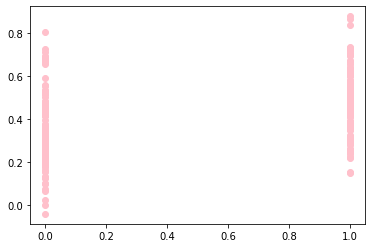

In [15]:
# No.5

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

data= pd.read_csv('/input/titanic.txt')
Survived=data['Survived']
del data['Name']
del data['Sex']
del data['Ticket']
del data['Fare']
del data['Cabin']
del data['Embarked']
  
data=data.fillna(data.mean())
y=data.Survived
x=data.drop('Survived',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

Belajar=LinearRegression().fit(x_train,y_train)
hasilPrediksi=Belajar.predict(x_test)
# No.5
# untuk menghasilkan Plot Predicted Value vs Measure
plt.scatter(y_test,hasilPrediksi,color='Pink')
plt.show()
# ANALISIS: Berdasarkan hasil output dapat dilihat jika x adalah measure dan y adalah plot Predicted value sehingga dapat dilihat jika hasil prediksi sudah cukup baik